In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding, SpectralEmbedding, Isomap
import time
from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("./microbes.csv")

In [3]:
#Clear data
data = data.drop(['Unnamed: 0'], axis = 1)

In [4]:
data.shape

(30527, 25)

In [5]:
data

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,10.70,15.8,5.43,3.75,0.7850,8.14,2.15,22.3,2.97,10.90,...,2.97,1.340,1.610,0.683,0.1950,3.63,12.10,1.310,7.99,Spirogyra
1,5.60,18.3,4.14,6.16,0.3640,3.51,18.60,22.5,5.41,19.20,...,5.47,1.520,1.520,1.010,0.2150,6.01,20.60,0.765,7.99,Spirogyra
2,8.32,19.8,4.63,6.66,0.4150,5.85,21.00,22.4,5.96,10.20,...,5.96,1.630,1.380,1.110,0.1820,6.55,11.50,0.953,7.99,Spirogyra
3,10.10,17.9,7.29,11.10,1.4700,6.30,9.94,21.9,8.81,10.70,...,8.88,2.040,2.120,0.715,0.3710,10.30,12.00,2.340,7.99,Spirogyra
4,6.27,20.2,20.10,10.70,14.7000,3.97,2.58,11.9,10.20,1.22,...,10.20,7.780,6.210,6.800,4.4400,14.00,9.55,17.600,7.99,Spirogyra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30522,3.01,22.6,4.90,20.00,0.4340,1.40,19.90,22.1,18.10,9.92,...,18.60,4.350,1.350,1.710,0.5490,19.10,13.20,1.070,7.15,Ulothrix
30523,5.19,22.6,2.07,19.40,0.0788,1.67,5.09,22.8,19.20,16.20,...,20.00,1.460,0.411,0.458,0.0597,19.80,17.20,0.197,7.15,Ulothrix
30524,9.21,22.7,2.07,21.00,0.0790,5.81,12.70,22.8,20.10,11.40,...,20.10,1.060,0.257,0.319,0.0341,20.70,11.60,0.198,7.15,Ulothrix
30525,8.21,22.6,1.87,20.50,0.0641,5.96,11.30,22.8,20.20,20.20,...,20.20,1.010,0.285,0.350,0.0314,20.80,20.40,0.162,7.15,Ulothrix


In [6]:
#Null Check
data.isnull().sum()

Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
raddi              0
microorganisms     0
dtype: int64

In [7]:
#No missing values for this dataset
data.isnull().sum().sum()

0

In [8]:
microorganisms = data['microorganisms'].unique()
microorganisms_counts = data.groupby(['microorganisms']).size()
print(microorganisms)

['Spirogyra' 'Volvox' 'Pithophora' 'Yeast' 'Raizopus' 'Penicillum'

 'Aspergillus sp' 'Protozoa' 'Diatom' 'Ulothrix']


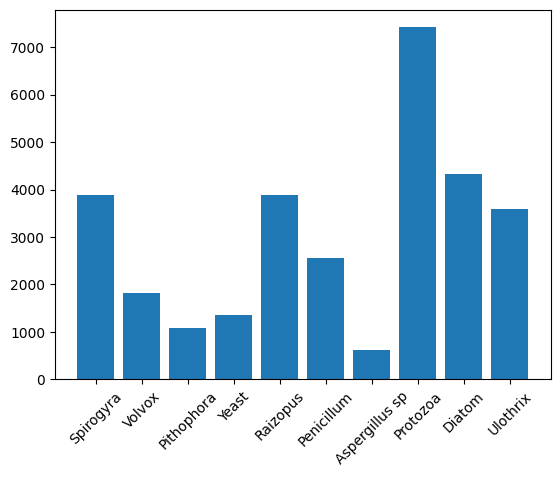

In [9]:
plt.bar(microorganisms,microorganisms_counts)
plt.xticks(rotation=45)
plt.show()

In [10]:
data= data[data.microorganisms !='Spirogyra']
data= data[data.microorganisms !='Penicillum']
data= data[data.microorganisms !='Pithophora']

In [11]:
microorganisms = data['microorganisms'].unique()
microorganisms_counts = data.groupby(['microorganisms']).size()
microorganisms.sort()
print(microorganisms)

['Aspergillus sp' 'Diatom' 'Protozoa' 'Raizopus' 'Ulothrix' 'Volvox'

 'Yeast']


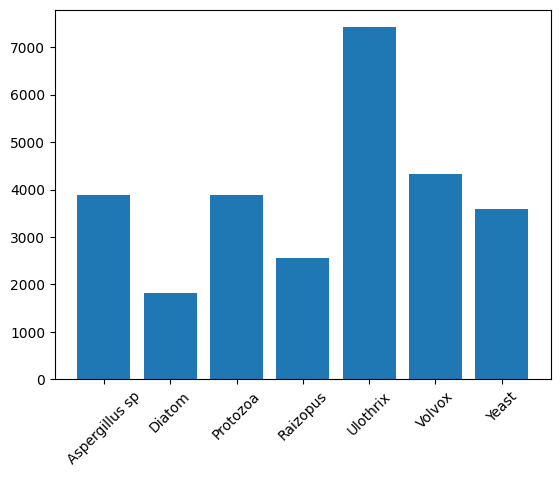

In [12]:
#Balance the data
plt.bar(microorganisms,microorganisms_counts)
plt.xticks(rotation=45)
plt.show()

In [13]:
data['microorganisms'].value_counts()

Ulothrix          7420
Volvox            4320
Aspergillus sp    3888
Protozoa          3888
Yeast             3600
Raizopus          2552
Diatom            1818
Name: microorganisms, dtype: int64

In [14]:
#Applying undersampling
def undersampling(microCount, k=1818):
  if len(microCount) < k:
    return microCount
  return microCount.sample(k)

In [15]:
data_undersampled = data.groupby('microorganisms').apply(undersampling).reset_index(drop=True)
data_undersampled ['microorganisms'].value_counts()

Aspergillus sp    1818
Diatom            1818
Protozoa          1818
Raizopus          1818
Ulothrix          1818
Volvox            1818
Yeast             1818
Name: microorganisms, dtype: int64

In [16]:
data_undersampled

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,10.80,12.3,1.85,15.600,0.0657,7.89,19.00,22.9,15.500,12.80,...,15.500,0.430,0.601,0.332,0.0234,15.600,13.00,0.158,3.40,Aspergillus sp
1,8.07,13.7,1.67,11.400,0.0520,5.96,20.90,22.9,11.200,9.09,...,11.200,0.522,0.694,0.299,0.0256,11.300,9.39,0.130,1.53,Aspergillus sp
2,6.71,18.3,4.58,7.680,0.4940,3.81,9.65,22.4,6.230,11.50,...,6.330,1.490,1.500,1.090,0.2200,7.730,12.60,0.931,3.50,Aspergillus sp
3,11.30,21.4,1.51,0.877,0.0458,8.95,12.90,22.9,0.406,9.79,...,0.406,0.487,0.284,0.188,0.0150,0.553,9.83,0.107,1.02,Aspergillus sp
4,8.07,13.7,1.67,11.400,0.0520,5.96,20.90,22.9,11.200,9.09,...,11.200,0.522,0.694,0.299,0.0256,11.300,9.39,0.130,1.53,Aspergillus sp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12721,8.58,20.7,3.86,2.090,0.2670,6.29,22.20,22.3,1.840,18.00,...,1.960,1.410,1.020,0.857,0.1240,2.150,19.20,0.668,6.41,Yeast
12722,9.89,18.1,4.00,8.160,0.3640,5.54,3.63,22.4,7.530,8.67,...,7.530,1.200,1.230,0.558,0.1150,8.110,10.00,0.714,4.29,Yeast
12723,11.30,22.1,5.08,20.100,0.4990,4.80,7.60,21.5,19.900,9.77,...,20.000,2.000,0.918,1.090,0.1620,20.800,10.90,1.140,5.89,Yeast
12724,9.19,21.8,6.72,15.900,0.9810,6.39,22.60,21.0,15.200,9.65,...,15.700,2.540,1.320,1.580,0.3440,15.800,12.50,1.990,4.96,Yeast


In [17]:
data_undersampled= data_undersampled.sample(frac = 1)
data_undersampled

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
788,10.20,17.5,2.940,14.10,0.1770,7.37,9.970,22.8,13.50,8.28,...,13.50,0.745,0.7950,0.5590,0.06100,14.10,8.73,0.3900,3.110,Aspergillus sp
133,6.03,21.9,5.420,18.50,0.5350,3.36,0.152,21.4,17.50,15.20,...,18.40,2.820,1.4400,1.6900,0.34100,18.40,18.70,1.3000,8.930,Aspergillus sp
2223,3.98,16.9,6.000,6.79,0.6630,2.96,11.600,21.3,6.21,13.30,...,6.21,2.390,2.6800,2.4300,0.62600,7.81,15.10,1.5900,5.360,Diatom
2009,5.57,19.8,5.860,6.03,0.6340,4.02,1.330,21.5,5.41,11.20,...,5.41,2.370,1.9900,2.3100,0.43000,6.15,13.50,1.5200,8.040,Diatom
8584,13.10,15.6,4.550,13.50,0.4760,9.71,1.330,22.5,13.20,6.71,...,13.20,0.985,1.2000,0.4480,0.11200,13.60,7.82,0.9210,8.140,Ulothrix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5853,20.70,17.6,0.904,4.86,0.0158,15.10,15.500,23.0,4.75,5.42,...,4.75,0.164,0.1700,0.0434,0.00313,4.63,5.39,0.0405,0.624,Raizopus
7803,9.71,22.6,0.764,13.30,0.0116,6.35,12.700,23.0,12.90,16.10,...,12.90,0.342,0.0991,0.0731,0.00488,13.00,16.10,0.0296,5.220,Ulothrix
8092,13.40,15.7,5.150,14.20,0.5080,8.26,2.440,22.1,13.60,15.40,...,13.60,1.070,1.3000,0.6920,0.14000,14.20,16.20,1.1800,6.200,Ulothrix
5983,8.78,12.9,0.879,15.00,0.0156,5.99,12.500,23.0,14.90,16.70,...,14.90,0.220,0.3000,0.1450,0.00698,14.90,16.80,0.0384,0.678,Raizopus


In [18]:
microorganisms = data_undersampled['microorganisms'].unique()
microorganisms_counts = data_undersampled.groupby(['microorganisms']).size()
print(microorganisms)

['Aspergillus sp' 'Diatom' 'Ulothrix' 'Raizopus' 'Volvox' 'Protozoa'

 'Yeast']


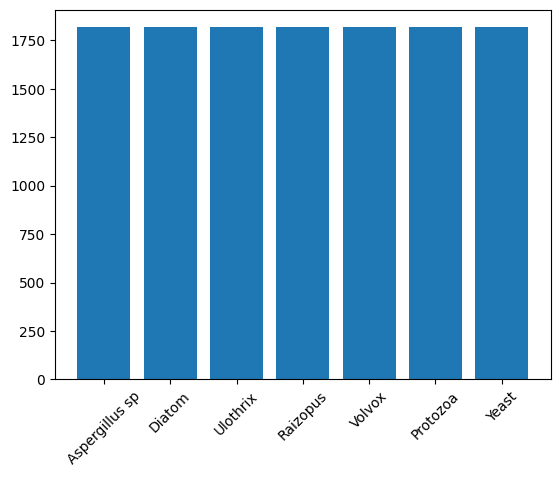

In [19]:
plt.bar(microorganisms,microorganisms_counts)
plt.xticks(rotation=45)
plt.show()

In [20]:
#Split data
X=data_undersampled[data_undersampled.columns[:-1]] 
y=data_undersampled['microorganisms']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.5,test_size=0.5,random_state = 0)

In [22]:
scaler = MinMaxScaler(feature_range=(-1, 1))
# scaler.fit(X_train)
features_scalar = scaler.fit_transform(X_train)
features_validation_scalar = scaler.transform(X_test)

c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


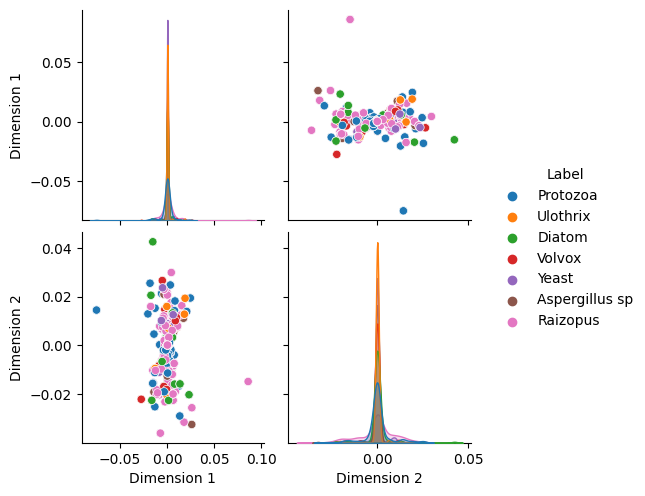

In [23]:
#spectral embedding
SE=SpectralEmbedding(n_components=2, n_neighbors=5)
features_embedded = SE.fit_transform(features_scalar)
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label':y_train})
sns.color_palette("tab10")
sns.pairplot(embedded_labels, hue='Label', palette="tab10")
plt.show()

c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


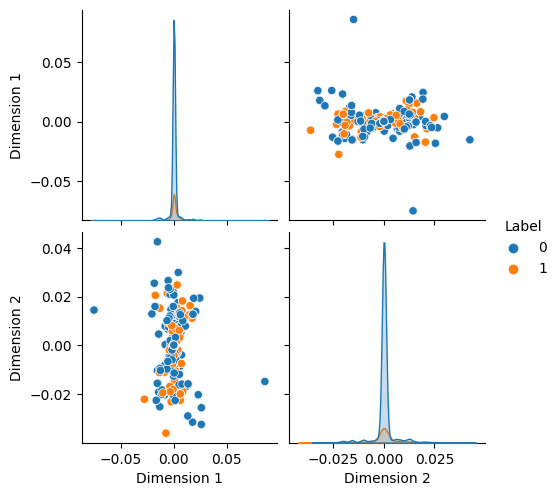

Clustering accuracy (homogeneity score):  0.3055563258675576

Clustering accuracy (silhouette score):  0.3151343291082427


c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


training time: 0.0009996891021728516 s



Classification accuracy:  0.0 




c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


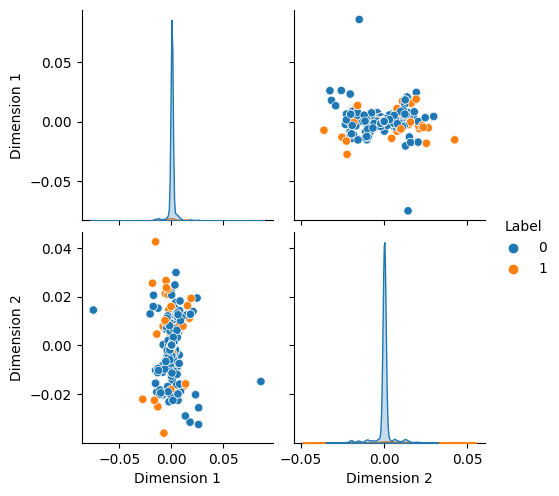

Clustering accuracy (homogeneity score):  0.3402284699561564

Clustering accuracy (silhouette score):  0.6685059894731942


c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


training time: 0.0009996891021728516 s



Classification accuracy:  0.0 




c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


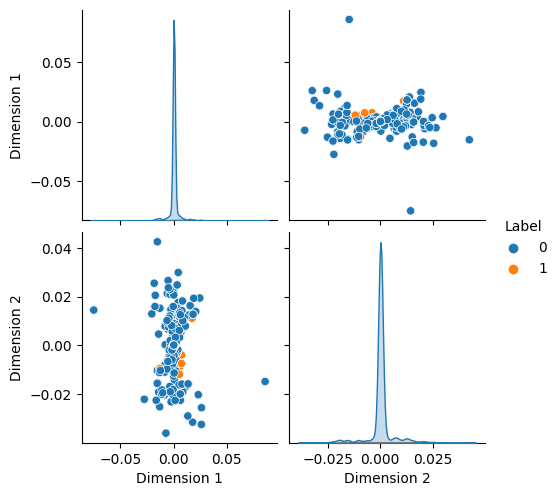

Clustering accuracy (homogeneity score):  0.15783063324332525

Clustering accuracy (silhouette score):  0.5675805708537449


c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


training time: 0.0010013580322265625 s



Classification accuracy:  0.0 




c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


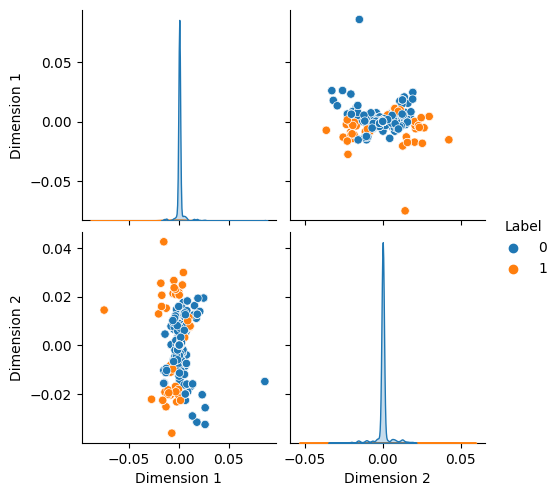

Clustering accuracy (homogeneity score):  0.7246194545742966

Clustering accuracy (silhouette score):  0.7777657901738235


c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


training time: 0.0010004043579101562 s



Classification accuracy:  0.0 




c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


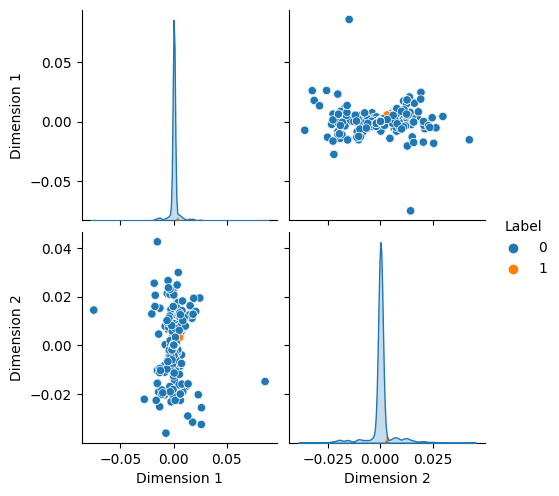

Clustering accuracy (homogeneity score):  0.20739392874165782

Clustering accuracy (silhouette score):  0.25475260045238074


c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


training time: 0.0010001659393310547 s



Classification accuracy:  0.0 




In [24]:
#Spectral Clustering

for i in range(5,30,5):
    spectralClustering = SpectralClustering(n_clusters=2, affinity= 'nearest_neighbors', n_neighbors=i)
    spectralClustering.fit(features_embedded)
    predicted_labels = spectralClustering.labels_
    embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
    sns.pairplot(embedded_labels, hue='Label',palette="tab10")
    plt.show()

    #More accurate implementation, considering opposite labels
    accuracy = homogeneity_score(y_train, predicted_labels)
    print ('Clustering accuracy (homogeneity score): ',accuracy*100)

    silhouette = silhouette_score(features_embedded, predicted_labels)
    print('Clustering accuracy (silhouette score): ',silhouette)
   
    SE=SpectralEmbedding(n_components=2, n_neighbors=5)
    #transform data
    features_test_embedded = SE.fit_transform(features_validation_scalar)
    
    clf = NearestCentroid()
    start_time=time.time()
    clf.fit(features_embedded, predicted_labels)
    end_time=time.time()
    print(f"training time: {end_time - start_time} s\n")
    predicted_labels = clf.predict(features_test_embedded)
    accuracy = accuracy_score(y_test, predicted_labels)		
    print ('Classification accuracy: ',accuracy*100, '\n')

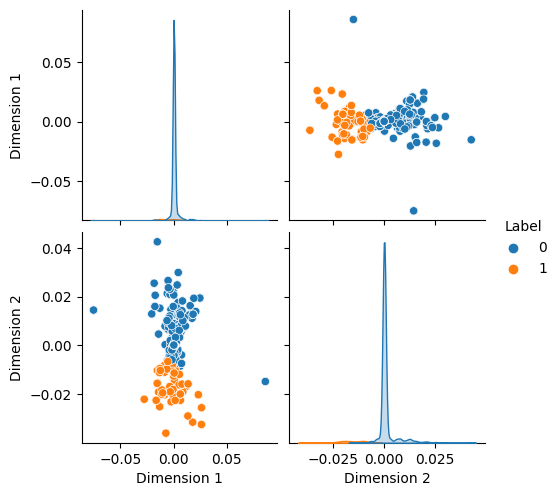

Clustering accuracy (homogeneity score):  1.0285635397191748

Clustering accuracy (silhouette score):  0.8082967819108016


c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


training time: 0.0009999275207519531 s



Classification accuracy:  0.0 




In [25]:
spectralClustering = SpectralClustering(n_clusters=2, affinity= 'rbf')
spectralClustering.fit(features_embedded)
predicted_labels = spectralClustering.labels_
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
sns.pairplot(embedded_labels, hue='Label',palette="tab10")
plt.show()

#More accurate implementation, considering opposite labels
accuracy = homogeneity_score(y_train, predicted_labels)
print ('Clustering accuracy (homogeneity score): ',accuracy*100)

silhouette = silhouette_score(features_embedded, predicted_labels)
print('Clustering accuracy (silhouette score): ',silhouette)
#clasify test_data 
SE=SpectralEmbedding(n_components=2, n_neighbors=5)
#transform data
features_test_embedded = SE.fit_transform(features_validation_scalar)
    
clf = NearestCentroid()
start_time=time.time()
clf.fit(features_embedded, predicted_labels)
end_time=time.time()
print(f"training time: {end_time - start_time} s\n")
predicted_labels = clf.predict(features_test_embedded)
accuracy = accuracy_score(y_test, predicted_labels)		
print ('Classification accuracy: ',accuracy*100, '\n')

c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


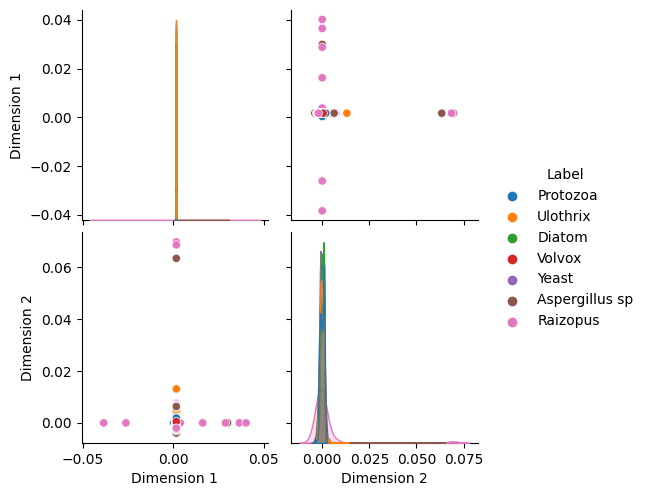

In [26]:
#spectral embedding
SE=SpectralEmbedding(n_components=2, n_neighbors=10)
features_embedded = SE.fit_transform(features_scalar)
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label':y_train})
sns.color_palette("tab10")
sns.pairplot(embedded_labels, hue='Label', palette="tab10")
plt.show()

c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


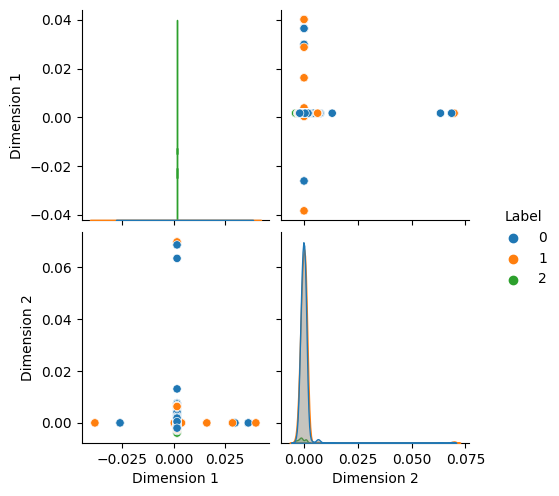

Clustering accuracy (homogeneity score):  0.2068971455838864

Clustering accuracy (silhouette score):  -0.11624388751148668


c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


training time: 0.0010001659393310547 s



Classification accuracy:  0.0 




c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


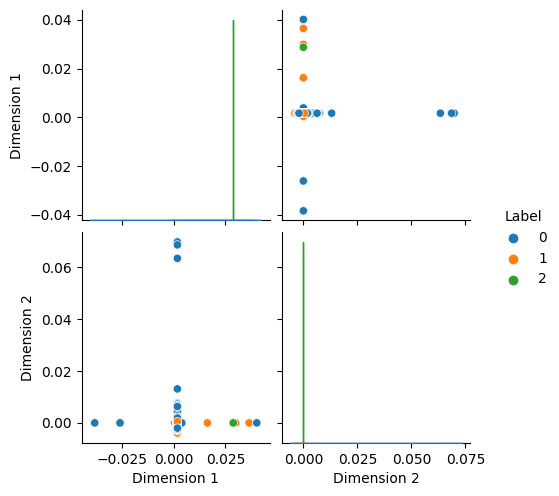

Clustering accuracy (homogeneity score):  0.4299023668638714

Clustering accuracy (silhouette score):  0.08579416591608038


c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


training time: 0.0009996891021728516 s



Classification accuracy:  0.0 




c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


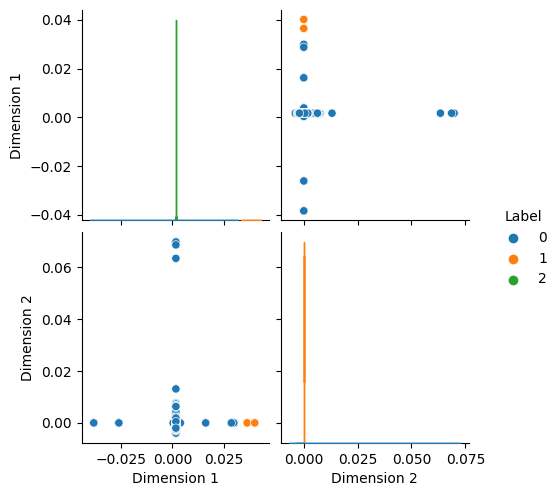

Clustering accuracy (homogeneity score):  0.9190595756579222

Clustering accuracy (silhouette score):  0.0028310597098959427


c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


training time: 0.0009984970092773438 s



Classification accuracy:  0.0 




c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


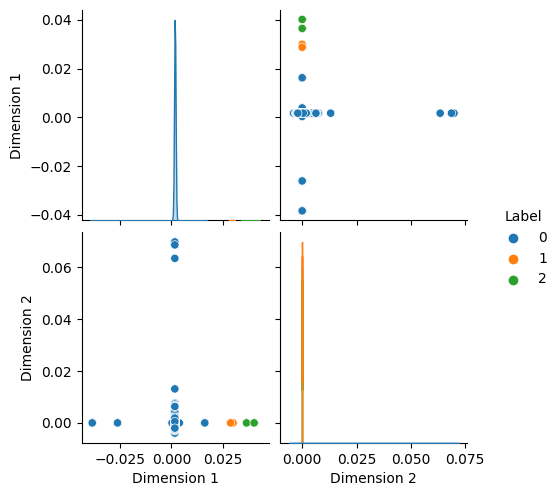

Clustering accuracy (homogeneity score):  0.9010454026734233

Clustering accuracy (silhouette score):  0.931522764308717


c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


training time: 0.0009996891021728516 s



Classification accuracy:  0.0 




c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


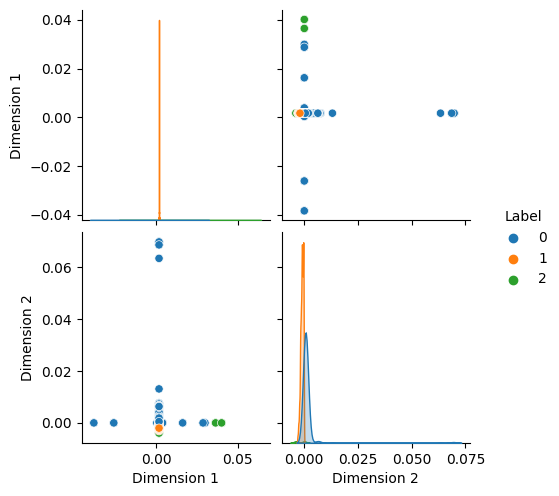

Clustering accuracy (homogeneity score):  1.04720013494515

Clustering accuracy (silhouette score):  0.38531497841951234


c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


training time: 0.0010004043579101562 s



Classification accuracy:  0.0 




In [27]:
#Spectral Clustering

for i in range(5,30,5):
    spectralClustering = SpectralClustering(n_clusters=3, affinity= 'nearest_neighbors', n_neighbors=i)
    spectralClustering.fit(features_embedded)
    predicted_labels = spectralClustering.labels_
    embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
    sns.pairplot(embedded_labels, hue='Label',palette="tab10")
    plt.show()

    #More accurate implementation, considering opposite labels
    accuracy = homogeneity_score(y_train, predicted_labels)
    print ('Clustering accuracy (homogeneity score): ',accuracy*100)

    silhouette = silhouette_score(features_embedded, predicted_labels)
    print('Clustering accuracy (silhouette score): ',silhouette)
   
    SE=SpectralEmbedding(n_components=2, n_neighbors=10)
    #transform data
    features_test_embedded = SE.fit_transform(features_validation_scalar)
    
    clf = NearestCentroid()
    start_time=time.time()
    clf.fit(features_embedded, predicted_labels)
    end_time=time.time()
    print(f"training time: {end_time - start_time} s\n")
    predicted_labels = clf.predict(features_test_embedded)
    accuracy = accuracy_score(y_test, predicted_labels)		
    print ('Classification accuracy: ',accuracy*100, '\n')

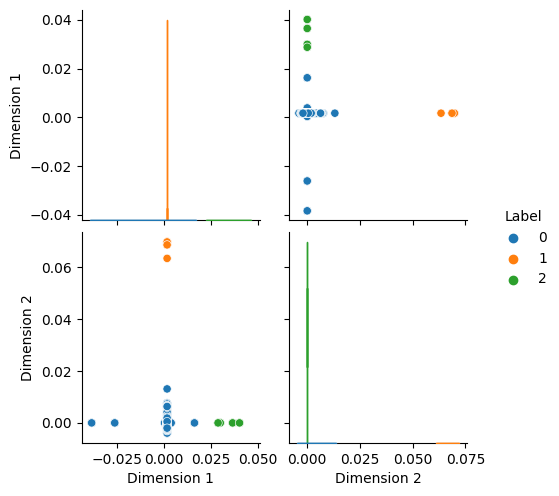

Clustering accuracy (homogeneity score):  1.2080430044931905

Clustering accuracy (silhouette score):  0.9503626161934908


c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


training time: 0.0009992122650146484 s



Classification accuracy:  0.0 




In [28]:
spectralClustering = SpectralClustering(n_clusters=3, affinity= 'rbf')
spectralClustering.fit(features_embedded)
predicted_labels = spectralClustering.labels_
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
sns.pairplot(embedded_labels, hue='Label',palette="tab10")
plt.show()

#More accurate implementation, considering opposite labels
accuracy = homogeneity_score(y_train, predicted_labels)
print ('Clustering accuracy (homogeneity score): ',accuracy*100)

silhouette = silhouette_score(features_embedded, predicted_labels)
print('Clustering accuracy (silhouette score): ',silhouette)
#clasify test_data 
SE=SpectralEmbedding(n_components=2, n_neighbors=10)
#transform data
features_test_embedded = SE.fit_transform(features_validation_scalar)
    
clf = NearestCentroid()
start_time=time.time()
clf.fit(features_embedded, predicted_labels)
end_time=time.time()
print(f"training time: {end_time - start_time} s\n")
predicted_labels = clf.predict(features_test_embedded)
accuracy = accuracy_score(y_test, predicted_labels)		
print ('Classification accuracy: ',accuracy*100, '\n')

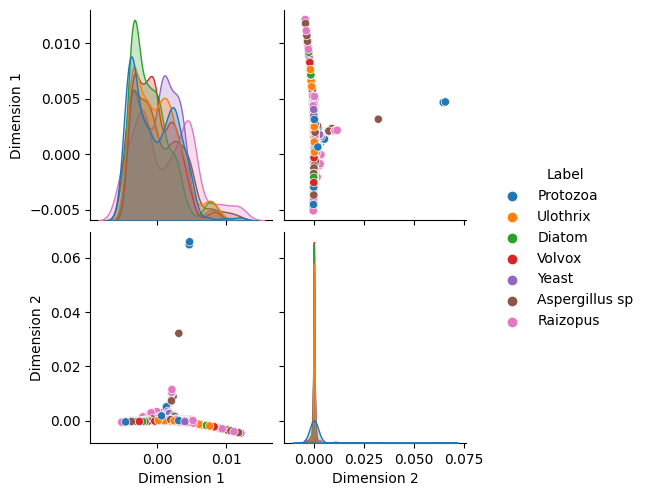

In [29]:
#spectral embedding
SE=SpectralEmbedding(n_components=2, n_neighbors=15)
features_embedded = SE.fit_transform(features_scalar)
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label':y_train})
sns.color_palette("tab10")
sns.pairplot(embedded_labels, hue='Label', palette="tab10")
plt.show()

c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


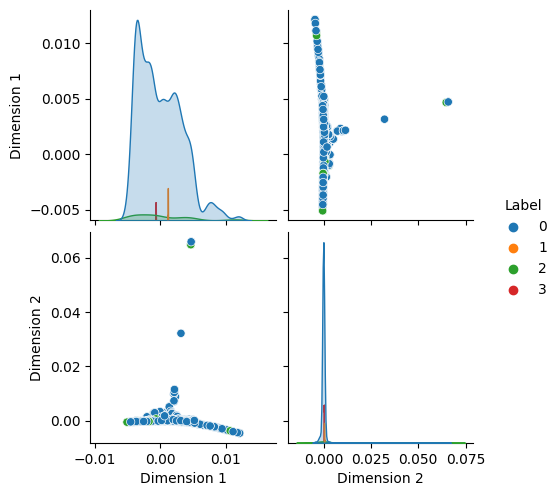

Clustering accuracy (homogeneity score):  0.7636638300558467

Clustering accuracy (silhouette score):  -0.5161938620395523

training time: 0.0010001659393310547 s



Classification accuracy:  0.0 




c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


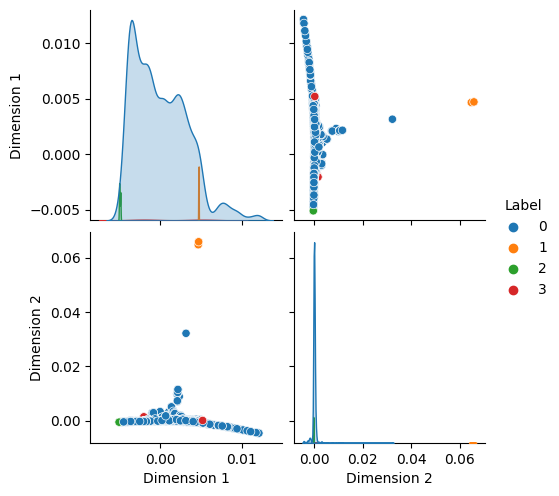

Clustering accuracy (homogeneity score):  1.0706767450721184

Clustering accuracy (silhouette score):  -0.12634615177865344

training time: 0.0 s



Classification accuracy:  0.0 




c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


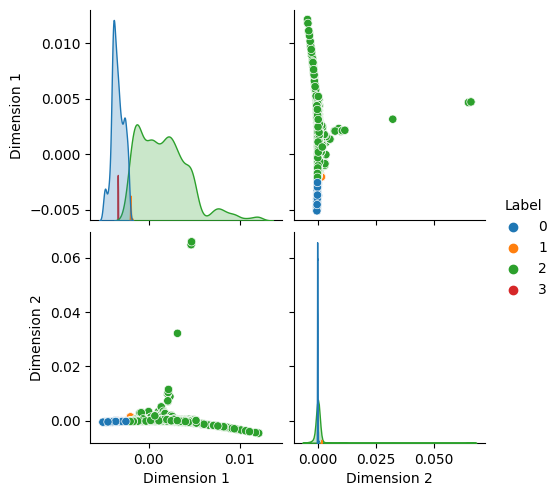

Clustering accuracy (homogeneity score):  0.7860195318977787

Clustering accuracy (silhouette score):  -0.03276065277729029

training time: 0.0009999275207519531 s



Classification accuracy:  0.0 




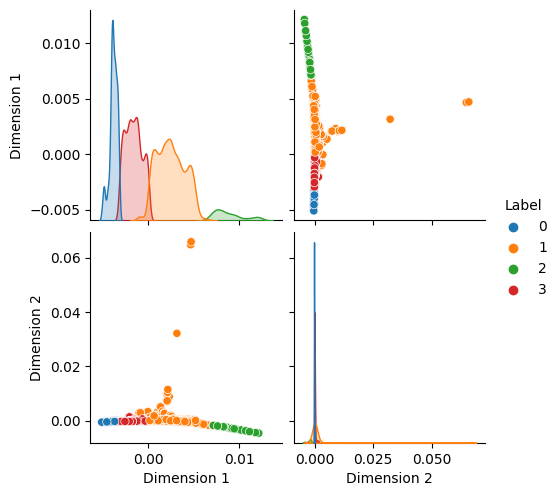

Clustering accuracy (homogeneity score):  1.1561924213863077

Clustering accuracy (silhouette score):  0.4686315969426099

training time: 0.0010025501251220703 s



Classification accuracy:  0.0 




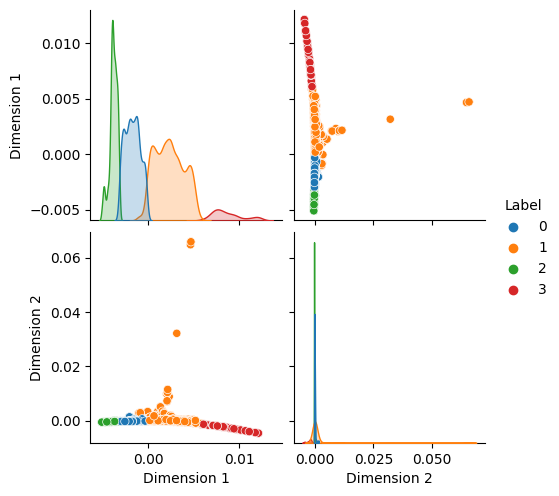

Clustering accuracy (homogeneity score):  1.1233359426128595

Clustering accuracy (silhouette score):  0.4640770903824784

training time: 0.0009999275207519531 s



Classification accuracy:  0.0 




In [30]:
#Spectral Clustering

for i in range(5,30,5):
    spectralClustering = SpectralClustering(n_clusters=4, affinity= 'nearest_neighbors', n_neighbors=i)
    spectralClustering.fit(features_embedded)
    predicted_labels = spectralClustering.labels_
    embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
    sns.pairplot(embedded_labels, hue='Label',palette="tab10")
    plt.show()

    #More accurate implementation, considering opposite labels
    accuracy = homogeneity_score(y_train, predicted_labels)
    print ('Clustering accuracy (homogeneity score): ',accuracy*100)

    silhouette = silhouette_score(features_embedded, predicted_labels)
    print('Clustering accuracy (silhouette score): ',silhouette)
   
    SE=SpectralEmbedding(n_components=2, n_neighbors=15)
    #transform data
    features_test_embedded = SE.fit_transform(features_validation_scalar)
    
    clf = NearestCentroid()
    start_time=time.time()
    clf.fit(features_embedded, predicted_labels)
    end_time=time.time()
    print(f"training time: {end_time - start_time} s\n")
    predicted_labels = clf.predict(features_test_embedded)
    accuracy = accuracy_score(y_test, predicted_labels)		
    print ('Classification accuracy: ',accuracy*100, '\n')

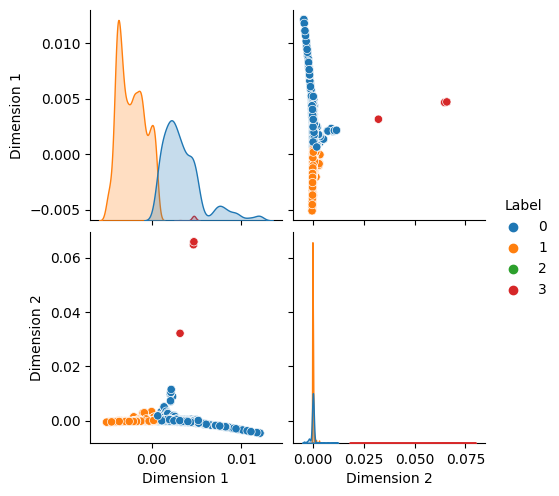

Clustering accuracy (homogeneity score):  0.9452311789483734

Clustering accuracy (silhouette score):  0.12217960411684703

training time: 0.0010001659393310547 s



Classification accuracy:  0.0 




In [31]:
spectralClustering = SpectralClustering(n_clusters=4, affinity= 'rbf')
spectralClustering.fit(features_embedded)
predicted_labels = spectralClustering.labels_
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
sns.pairplot(embedded_labels, hue='Label',palette="tab10")
plt.show()

#More accurate implementation, considering opposite labels
accuracy = homogeneity_score(y_train, predicted_labels)
print ('Clustering accuracy (homogeneity score): ',accuracy*100)

silhouette = silhouette_score(features_embedded, predicted_labels)
print('Clustering accuracy (silhouette score): ',silhouette)
#clasify test_data 
SE=SpectralEmbedding(n_components=2, n_neighbors=15)
#transform data
features_test_embedded = SE.fit_transform(features_validation_scalar)
    
clf = NearestCentroid()
start_time=time.time()
clf.fit(features_embedded, predicted_labels)
end_time=time.time()
print(f"training time: {end_time - start_time} s\n")
predicted_labels = clf.predict(features_test_embedded)
accuracy = accuracy_score(y_test, predicted_labels)		
print ('Classification accuracy: ',accuracy*100, '\n')

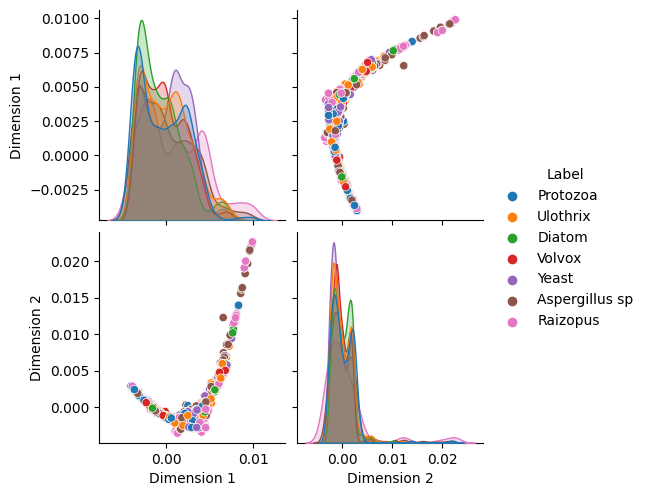

In [32]:
#spectral embedding
SE=SpectralEmbedding(n_components=2, n_neighbors=20)
features_embedded = SE.fit_transform(features_scalar)
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label':y_train})
sns.color_palette("tab10")
sns.pairplot(embedded_labels, hue='Label', palette="tab10")
plt.show()

c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


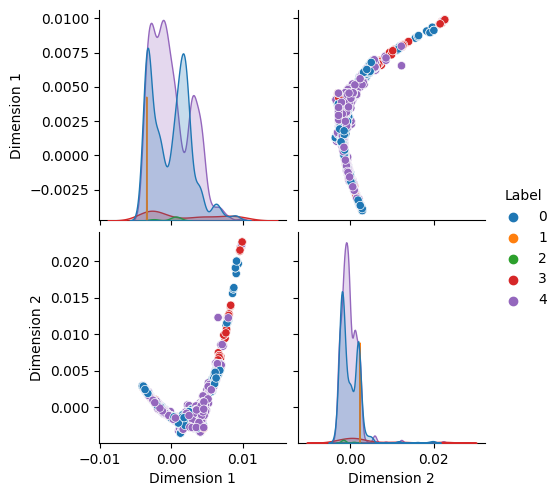

Clustering accuracy (homogeneity score):  1.000675165382255

Clustering accuracy (silhouette score):  -0.4607341952330162

training time: 0.0009975433349609375 s



Classification accuracy:  0.0 




c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


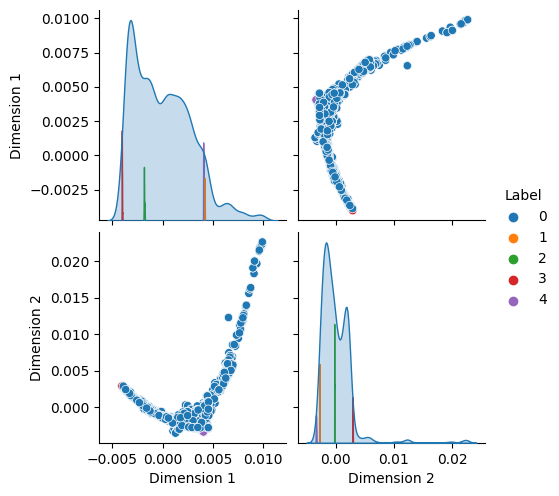

Clustering accuracy (homogeneity score):  0.9720945725158362

Clustering accuracy (silhouette score):  -0.5381690523848016

training time: 0.001009225845336914 s



Classification accuracy:  0.0 




c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


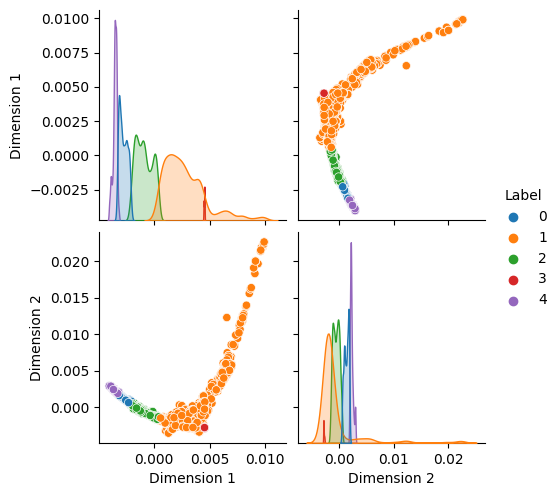

Clustering accuracy (homogeneity score):  1.6813013701713837

Clustering accuracy (silhouette score):  0.22250700389540398

training time: 0.002000570297241211 s



Classification accuracy:  0.0 




c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


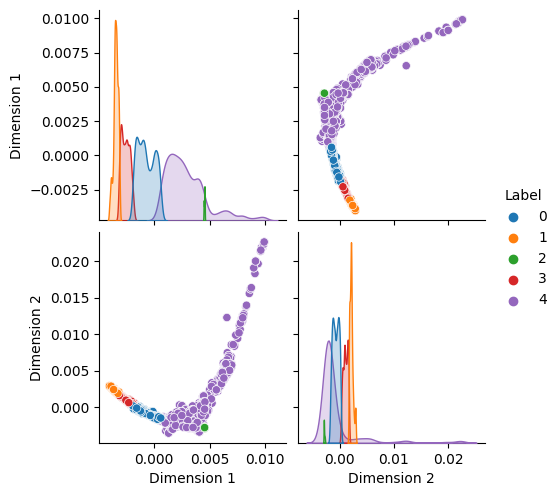

Clustering accuracy (homogeneity score):  1.6140668917478476

Clustering accuracy (silhouette score):  0.23861059196994577

training time: 0.0010001659393310547 s



Classification accuracy:  0.0 




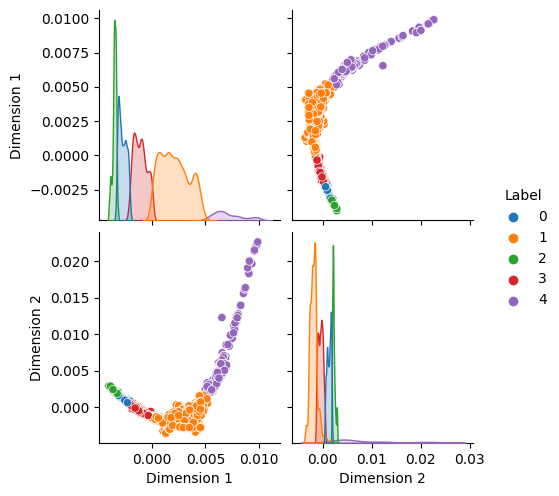

Clustering accuracy (homogeneity score):  1.608138259948785

Clustering accuracy (silhouette score):  0.47948000642552996

training time: 0.0010001659393310547 s



Classification accuracy:  0.0 




In [33]:
#Spectral Clustering

for i in range(5,30,5):
    spectralClustering = SpectralClustering(n_clusters=5, affinity= 'nearest_neighbors', n_neighbors=i)
    spectralClustering.fit(features_embedded)
    predicted_labels = spectralClustering.labels_
    embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
    sns.pairplot(embedded_labels, hue='Label',palette="tab10")
    plt.show()

    #More accurate implementation, considering opposite labels
    accuracy = homogeneity_score(y_train, predicted_labels)
    print ('Clustering accuracy (homogeneity score): ',accuracy*100)

    silhouette = silhouette_score(features_embedded, predicted_labels)
    print('Clustering accuracy (silhouette score): ',silhouette)
   
    SE=SpectralEmbedding(n_components=2, n_neighbors=20)
    #transform data
    features_test_embedded = SE.fit_transform(features_validation_scalar)
    
    clf = NearestCentroid()
    start_time=time.time()
    clf.fit(features_embedded, predicted_labels)
    end_time=time.time()
    print(f"training time: {end_time - start_time} s\n")
    predicted_labels = clf.predict(features_test_embedded)
    accuracy = accuracy_score(y_test, predicted_labels)		
    print ('Classification accuracy: ',accuracy*100, '\n')

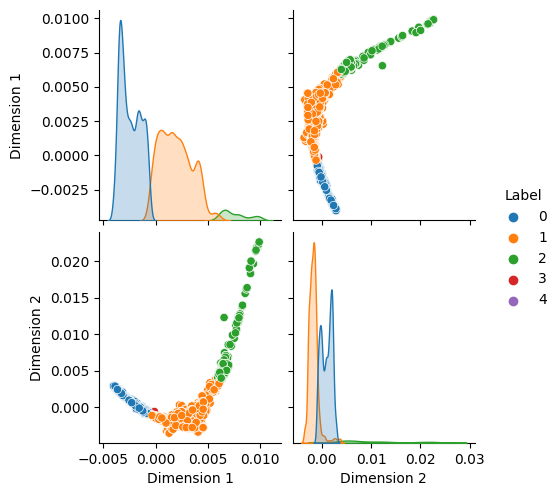

Clustering accuracy (homogeneity score):  0.5951864392000487

Clustering accuracy (silhouette score):  0.15493979613830092

training time: 0.0010001659393310547 s



Classification accuracy:  0.0 




In [34]:
spectralClustering = SpectralClustering(n_clusters=5, affinity= 'rbf')
spectralClustering.fit(features_embedded)
predicted_labels = spectralClustering.labels_
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
sns.pairplot(embedded_labels, hue='Label',palette="tab10")
plt.show()

#More accurate implementation, considering opposite labels
accuracy = homogeneity_score(y_train, predicted_labels)
print ('Clustering accuracy (homogeneity score): ',accuracy*100)

silhouette = silhouette_score(features_embedded, predicted_labels)
print('Clustering accuracy (silhouette score): ',silhouette)
#clasify test_data 
SE=SpectralEmbedding(n_components=2, n_neighbors=20)
#transform data
features_test_embedded = SE.fit_transform(features_validation_scalar)
    
clf = NearestCentroid()
start_time=time.time()
clf.fit(features_embedded, predicted_labels)
end_time=time.time()
print(f"training time: {end_time - start_time} s\n")
predicted_labels = clf.predict(features_test_embedded)
accuracy = accuracy_score(y_test, predicted_labels)		
print ('Classification accuracy: ',accuracy*100, '\n')

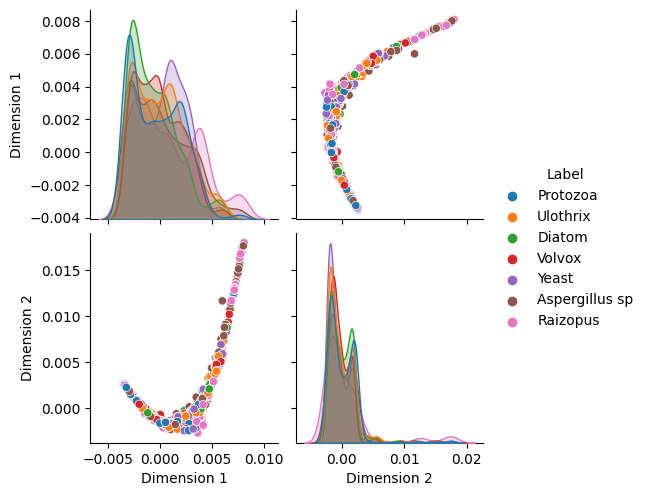

In [35]:
#spectral embedding
SE=SpectralEmbedding(n_components=2, n_neighbors=25)
features_embedded = SE.fit_transform(features_scalar)
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label':y_train})
sns.color_palette("tab10")
sns.pairplot(embedded_labels, hue='Label', palette="tab10")
plt.show()

c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


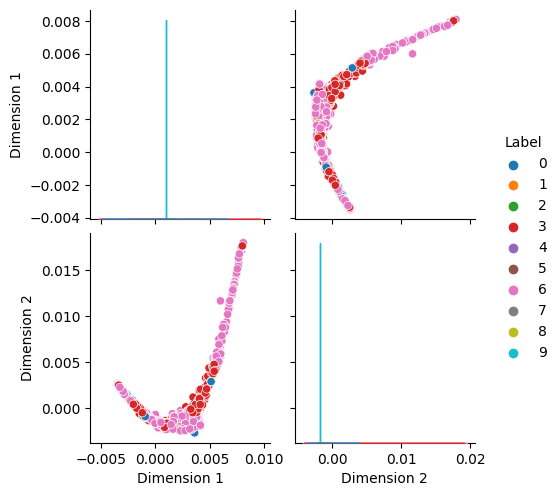

Clustering accuracy (homogeneity score):  0.8743512539649435

Clustering accuracy (silhouette score):  -0.6540011680069695

training time: 0.0009975433349609375 s



Classification accuracy:  0.0 




c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


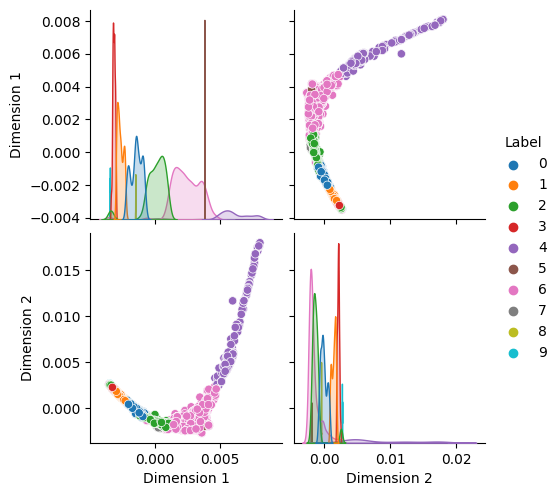

Clustering accuracy (homogeneity score):  2.5805377221153107

Clustering accuracy (silhouette score):  0.11152094535581852

training time: 0.0009999275207519531 s



Classification accuracy:  0.0 




c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.

  warnings.warn(


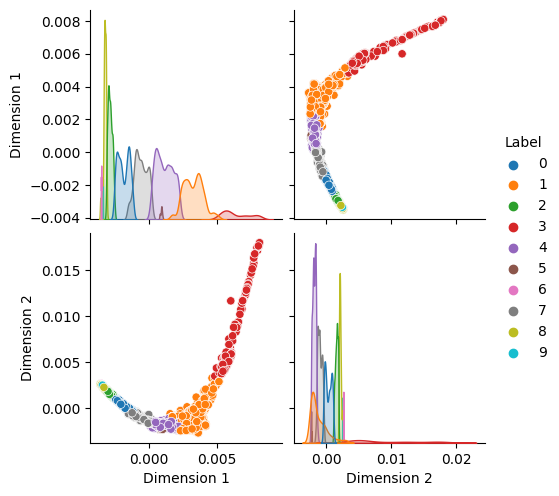

Clustering accuracy (homogeneity score):  2.9027970322701715

Clustering accuracy (silhouette score):  0.2790299155931898

training time: 0.0010004043579101562 s



Classification accuracy:  0.0 




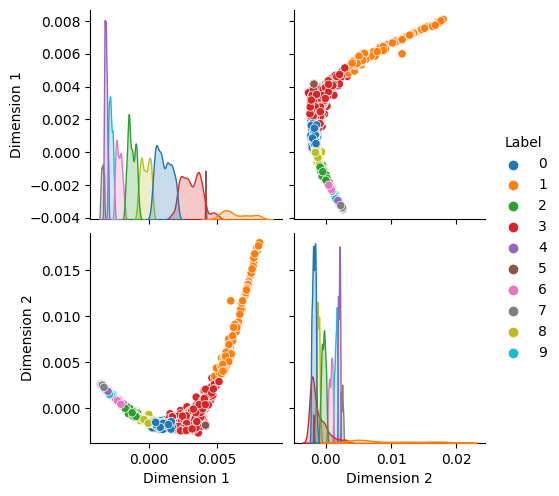

Clustering accuracy (homogeneity score):  3.2180084719257396

Clustering accuracy (silhouette score):  0.3906592271683835

training time: 0.0010004043579101562 s



Classification accuracy:  0.0 




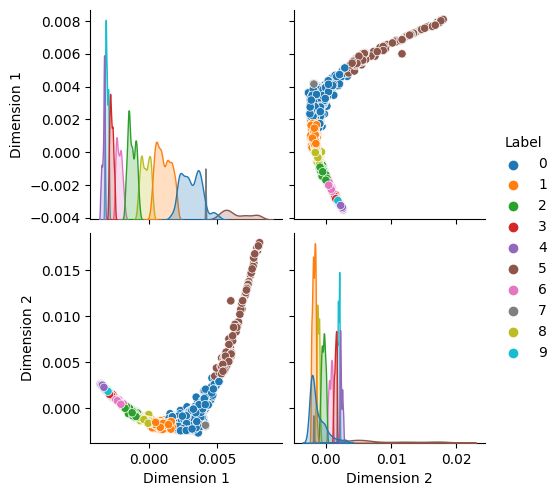

Clustering accuracy (homogeneity score):  3.06838417145252

Clustering accuracy (silhouette score):  0.3771923729671207

training time: 0.002007722854614258 s



Classification accuracy:  0.0 




In [36]:
#Spectral Clustering

for i in range(5,30,5):
    spectralClustering = SpectralClustering(n_clusters=10, affinity= 'nearest_neighbors', n_neighbors=i)
    spectralClustering.fit(features_embedded)
    predicted_labels = spectralClustering.labels_
    embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
    sns.pairplot(embedded_labels, hue='Label',palette="tab10")
    plt.show()

    #More accurate implementation, considering opposite labels
    accuracy = homogeneity_score(y_train, predicted_labels)
    print ('Clustering accuracy (homogeneity score): ',accuracy*100)

    silhouette = silhouette_score(features_embedded, predicted_labels)
    print('Clustering accuracy (silhouette score): ',silhouette)
   
    SE=SpectralEmbedding(n_components=2, n_neighbors=25)
    #transform data
    features_test_embedded = SE.fit_transform(features_validation_scalar)
    
    clf = NearestCentroid()
    start_time=time.time()
    clf.fit(features_embedded, predicted_labels)
    end_time=time.time()
    print(f"training time: {end_time - start_time} s\n")
    predicted_labels = clf.predict(features_test_embedded)
    accuracy = accuracy_score(y_test, predicted_labels)		
    print ('Classification accuracy: ',accuracy*100, '\n')

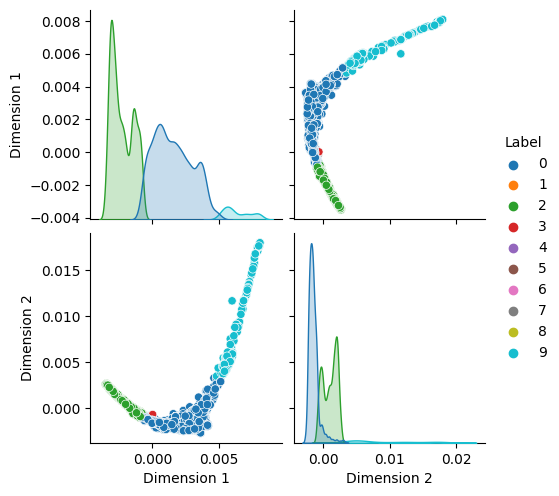

Clustering accuracy (homogeneity score):  0.6900489947906147

Clustering accuracy (silhouette score):  0.0806321953146989

training time: 0.002000093460083008 s



Classification accuracy:  0.0 




In [37]:
spectralClustering = SpectralClustering(n_clusters=10, affinity= 'rbf')
spectralClustering.fit(features_embedded)
predicted_labels = spectralClustering.labels_
embedded_labels = pd.DataFrame({'Dimension 1': features_embedded[: ,0], 'Dimension 2': features_embedded[: ,1],'Label': predicted_labels})
sns.pairplot(embedded_labels, hue='Label',palette="tab10")
plt.show()

#More accurate implementation, considering opposite labels
accuracy = homogeneity_score(y_train, predicted_labels)
print ('Clustering accuracy (homogeneity score): ',accuracy*100)

silhouette = silhouette_score(features_embedded, predicted_labels)
print('Clustering accuracy (silhouette score): ',silhouette)
#clasify test_data 
SE=SpectralEmbedding(n_components=2, n_neighbors=25)
#transform data
features_test_embedded = SE.fit_transform(features_validation_scalar)
    
clf = NearestCentroid()
start_time=time.time()
clf.fit(features_embedded, predicted_labels)
end_time=time.time()
print(f"training time: {end_time - start_time} s\n")
predicted_labels = clf.predict(features_test_embedded)
accuracy = accuracy_score(y_test, predicted_labels)		
print ('Classification accuracy: ',accuracy*100, '\n')